In [19]:
import pandas as pd
import numpy as np

In [20]:
file_path = "../data/processed/cleaned_dataset_eng_npi.csv"
df = pd.read_csv(file_path)

In [21]:
df.sample(5)

,src_tokens,trg_tokens,src_ids,trg_ids,src_len,trg_len
1041,"['▁the', '▁police', '▁came', '▁qu', 'ick', 'ly...","['▁पु', 'ल', 'िस', '▁छिट', '्ट', 'ै', '▁आ', 'ए...","[2, 23, 883, 583, 270, 332, 113, 4, 3]","[2, 381, 935, 284, 504, 178, 947, 51, 955, 4, 3]",9,11
2614,"['▁this', '▁morning', '▁was', '▁much', '▁c', '...","['▁हिजो', '▁बिहान', '▁हेर', 'ी', '▁आज', '▁बिहा...","[2, 86, 682, 74, 303, 27, 362, 48, 247, 540, 6...","[2, 435, 599, 730, 945, 265, 599, 630, 876, 10...",13,12
348,"['▁i', '▁cannot', '▁be', 'at', '▁tom', '.']","['▁म', '▁टमलाई', '▁जित', '्न', '▁सक्दिन', '।']","[2, 8, 192, 60, 58, 22, 4, 3]","[2, 6, 116, 794, 76, 359, 4, 3]",8,8
1636,"['▁how', '▁old', '▁were', '▁you', '▁at', '▁tha...","['▁त्यति', 'ब', 'ेला', '▁तपाईको', '▁उमेर', '▁क...","[2, 153, 414, 218, 21, 132, 56, 194, 6, 3]","[2, 890, 950, 655, 543, 869, 230, 105, 926, 5, 3]",10,11
635,"['▁i', '▁am', '▁drink', 'ing', '▁coffee', '.']","['▁म', '▁कफी', '▁पि', 'इ', 'रहेको', '▁छु', '।']","[2, 8, 104, 558, 33, 746, 4, 3]","[2, 6, 525, 247, 970, 413, 119, 4, 3]",8,9


In [22]:
print("English Lengths:")
print(df['src_len'].describe())
print("\nGerman Lengths:")
print(df['trg_len'].describe())

English Lengths:
count    2689.000000
mean       11.011528
std         3.382413
min         4.000000
25%         9.000000
50%        10.000000
75%        13.000000
max        42.000000
Name: src_len, dtype: float64

German Lengths:
count    2689.000000
mean       11.677575
std         3.789055
min         4.000000
25%         9.000000
50%        11.000000
75%        13.000000
max        42.000000
Name: trg_len, dtype: float64


In [23]:
# !pip install matplotlib seaborn

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

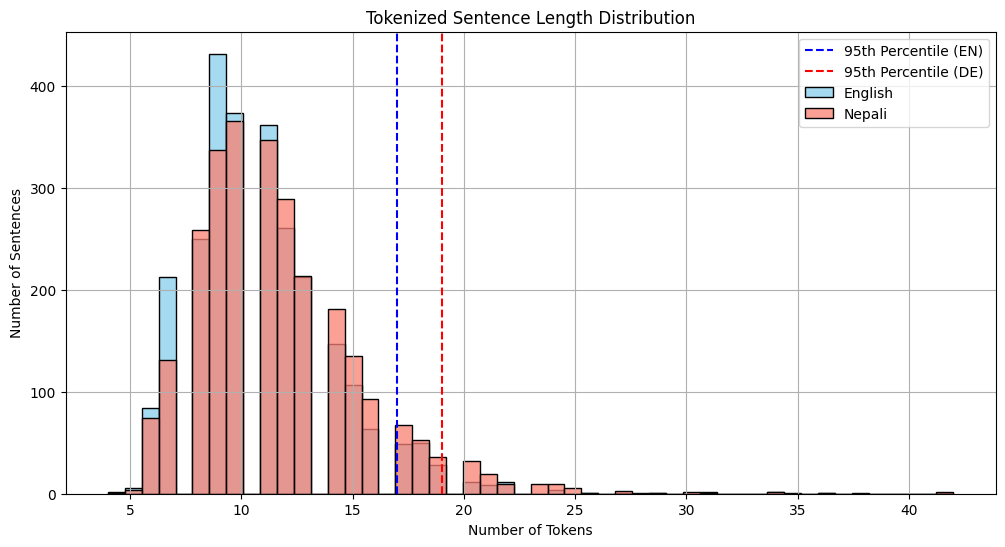

In [25]:


plt.figure(figsize=(12, 6))
sns.histplot(df['src_len'], bins=50, color='skyblue', label='English')
sns.histplot(df['trg_len'], bins=50, color='salmon', label='Nepali')
plt.axvline(df['src_len'].quantile(0.95), color='blue', linestyle='--', label='95th Percentile (EN)')
plt.axvline(df['trg_len'].quantile(0.95), color='red', linestyle='--', label='95th Percentile (DE)')
plt.title('Tokenized Sentence Length Distribution')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Sentences')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
en_95 = df['src_len'].quantile(0.95)
npi_95 = df['trg_len'].quantile(0.95)



print(f"95th percentile (English): {en_95}")
print(f"95th percentile (Nepali): {npi_95}")


95th percentile (English): 17.0
95th percentile (Nepali): 19.0


In [27]:
# !pip install wordcloud

In [28]:
print(df['src_ids'].head())
print(type(df['src_ids'].iloc[0]))


0            [2, 213, 6, 3]
1        [2, 49, 406, 4, 3]
2        [2, 49, 406, 4, 3]
3            [2, 410, 4, 3]
4    [2, 46, 39, 974, 5, 3]
Name: src_ids, dtype: object
<class 'str'>


In [29]:
import ast

df['src_ids'] = df['src_ids'].apply(ast.literal_eval)
df['trg_ids'] = df['trg_ids'].apply(ast.literal_eval)

In [30]:
print(df['src_ids'].head())
print(type(df['src_ids'].iloc[0]))

0            [2, 213, 6, 3]
1        [2, 49, 406, 4, 3]
2        [2, 49, 406, 4, 3]
3            [2, 410, 4, 3]
4    [2, 46, 39, 974, 5, 3]
Name: src_ids, dtype: object
<class 'list'>


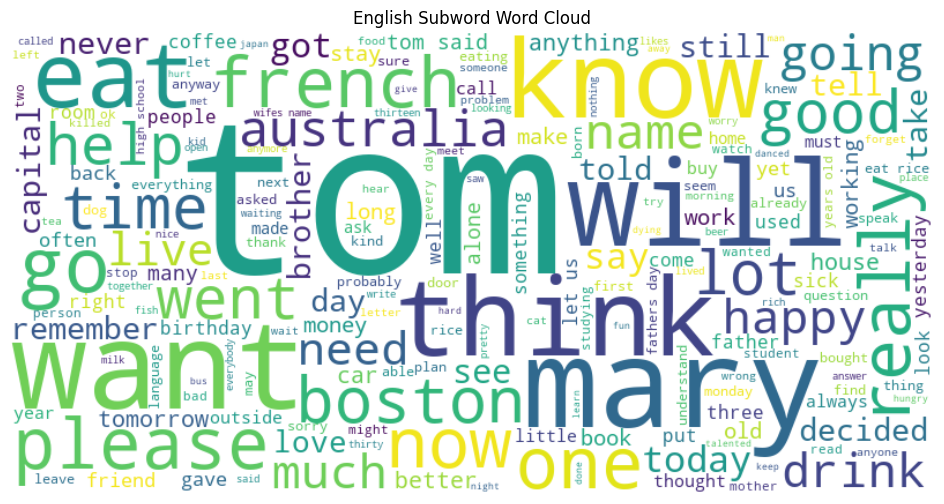

In [31]:
from wordcloud import WordCloud
import sentencepiece as spm
import matplotlib.pyplot as plt  # Required to show the plot

# Load the SentencePiece model for English
sp_en = spm.SentencePieceProcessor()
sp_en.load("../data/processed/spm_eng_n.model")

# Decode token ids back to subwords for English
all_english_subwords = [
    subword for sent in df['src_ids']
    for subword in sp_en.decode_ids(sent).split()
]

# Create text blob
english_text_blob = ' '.join(all_english_subwords)

# Generate word cloud
wordcloud_en = WordCloud(width=800, height=400, background_color='white').generate(english_text_blob)

# Display
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_en, interpolation='bilinear')
plt.axis('off')
plt.title('English Subword Word Cloud')
plt.show()


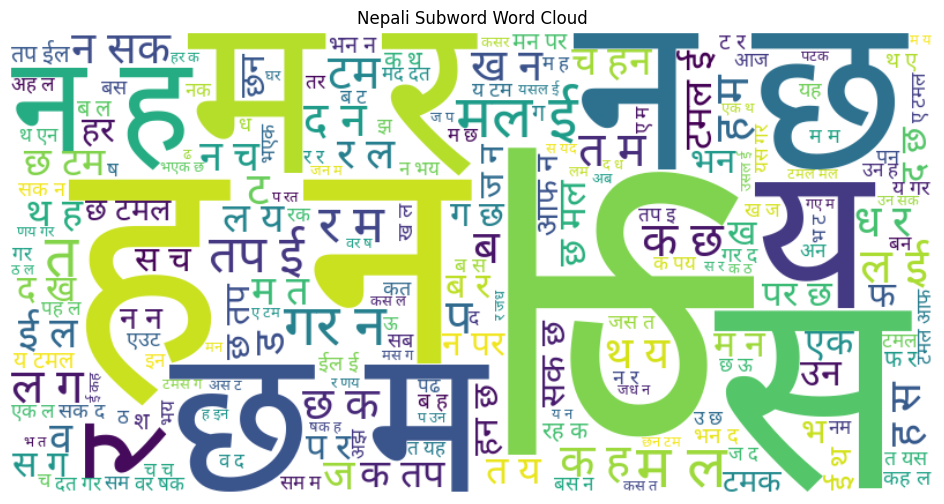

In [32]:
# Load SentencePiece model
sp_npi = spm.SentencePieceProcessor()
sp_npi.load("../data/processed/spm_npi_e.model")

# Decode subword IDs to strings
all_nepali_subwords = [
    subword for sent in df['trg_ids']
    for subword in sp_npi.decode_ids(sent).split()
]

# Join subwords
nepali_text_blob = ' '.join(all_nepali_subwords)

# Generate word cloud with Devanagari-supporting font
wordcloud_npi = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path='../data/raw/npi-eng/NotoSansDevanagari-Regular.ttf' 
).generate(nepali_text_blob)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_npi, interpolation='bilinear')
plt.axis('off')
plt.title('Nepali Subword Word Cloud')
plt.show()